# Create a a *pseudo* 3D survey from 2D lines
This notebook will propose to create a 'pseudo3D' survey. It is a convenient way of inverting a set of 2D lines and vizualizing them together in a 3D setup. Note that this is *not* a 3D inversion, just a 3D visualization of a set of 2D surveys.

API methods:
- `Project.createPseudo3DSurvey()` : creates new pseudo 3D survey, supply input several input files corresponding to 2D lines and `ftype` (similar to `Project.createBatchSurvey()`.
- `Project.createMultiMesh()` : creates the multiple 2D meshes
- `Project.importPseudo3DElec()` : import electrodes as .csv *with 3D-like labels*
- `Project.showPseudo3DMesh()` : show 2D meshes in a 3D grid
- `Project.invertPseudo3D()` : invert the pseudo 3D mesh
- `Project.showPseudo3DResults()` : show the 2D inverted survey into a 3D pyvista plotter

In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
import sys
sys.path.append((os.path.relpath('../src'))) # add here the relative path of the API folder
testdir = '../src/examples/'
from resipy import Project
import pyvista as pv

API path =  /media/jkl/data/phd/resipy/src/resipy
ResIPy version =  3.4.6
cR2.exe found and up to date.
R3t.exe found and up to date.
cR3t.exe found and up to date.


In [2]:
k = Project(typ='R2') # note that it is fundamentally a set of 2D surveys
k.createPseudo3DSurvey(testdir + 'dc-2d-timelapse/data', lineSpacing=1,
                 ftype='Syscal')

Working directory is: /media/jkl/data/phd/resipy/src/resipy
clearing dirname
3/3 imported
Working directory is: /media/jkl/data/phd/resipy/src/resipy/invdir/17031501
Working directory is: /media/jkl/data/phd/resipy/src/resipy/invdir/17040301
Working directory is: /media/jkl/data/phd/resipy/src/resipy/invdir/17051601
924/1032 reciprocal measurements found.
0 measurements error > 20 %


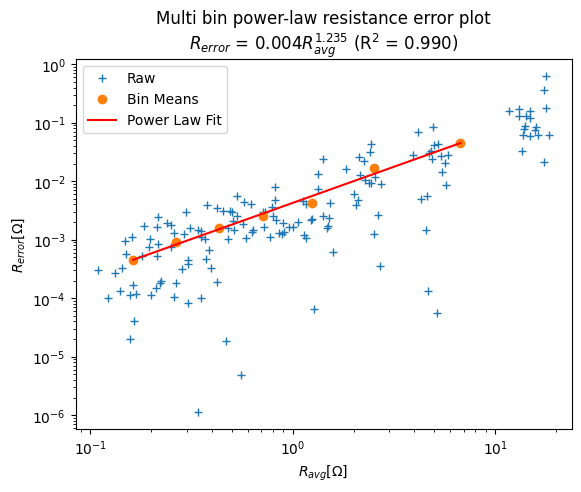

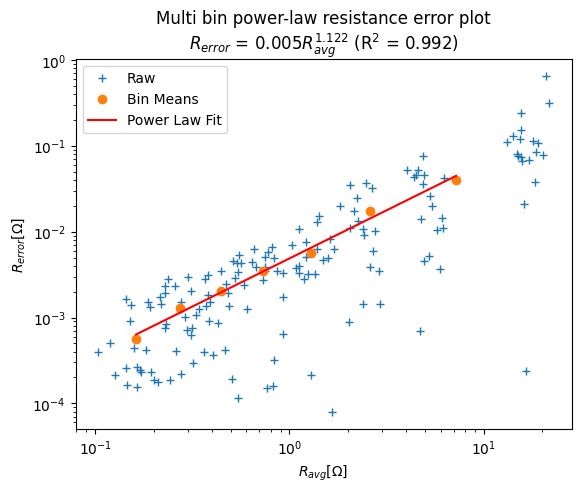

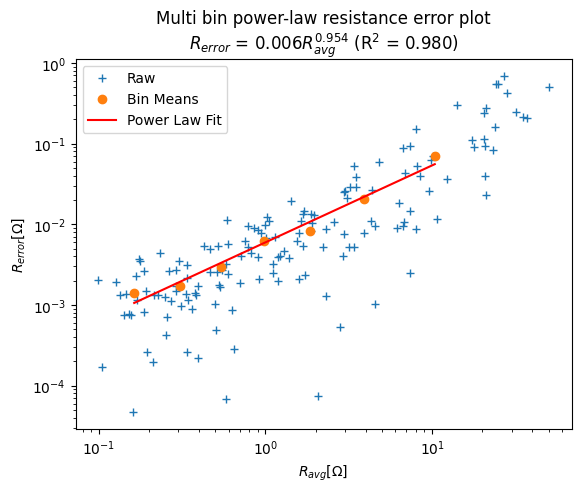

In [3]:
# filtering options and other works as expected for batch survey
k.fitErrorPwl()

In [4]:
# load 3D-like labels for elec positions of all lines
k.importPseudo3DElec(testdir + 'dc-2d-timelapse/elec3pseudo3D.csv')
k.elec # note the 3D-like 'label' column 
# with a line and an electrode number separated by a space

,x,y,z,remote,buried,label
0,0.00,0.0,0.0,False,False,1 1
1,0.25,0.0,0.0,False,False,1 2
2,0.50,0.0,0.0,False,False,1 3
3,0.75,0.0,0.0,False,False,1 4
4,1.00,0.0,0.0,False,False,1 5
...,...,...,...,...,...,...
67,4.75,2.0,0.0,False,False,3 20
68,5.00,2.0,0.0,False,False,3 21
69,5.25,2.0,0.0,False,False,3 22
70,5.50,2.0,0.0,False,False,3 23


In [5]:
k.createMultiMesh(typ='trian', runParallel=True)

Creating triangular mesh...done (1786 elements)
Creating triangular mesh...done (1786 elements)
Creating triangular mesh...done (1786 elements)


The 2D meshes can be viewed in 3D using `showPseudo3DMesh()` (requires pyvista).

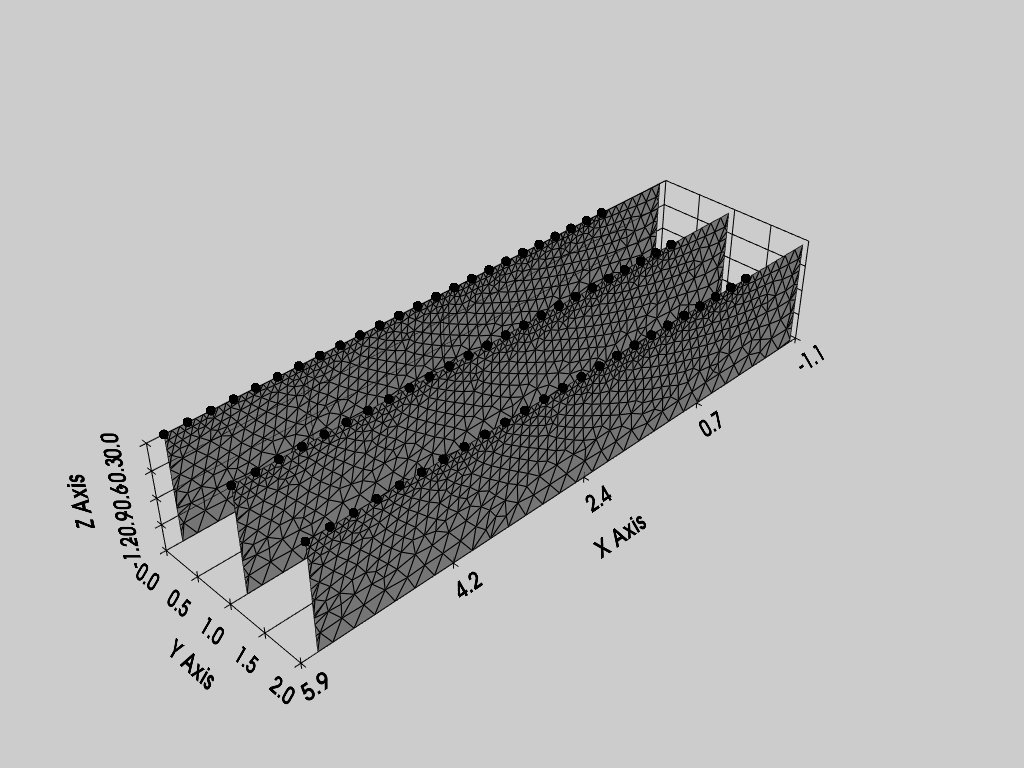

In [6]:
pl = pv.Plotter(notebook=True)
k.showPseudo3DMesh(ax=pl, cropMesh=True) # only works with pyvista

Writing .in file and protocol.dat for 17031501 survey... done
Writing .in file and protocol.dat for 17040301 survey... done
Writing .in file and protocol.dat for 17051601 survey... done
----------- PARALLEL INVERSION BEGINS ----------
0/3 inversions completed

All ok
All ok


2/3 inversions completed

All ok


3/3 inversions completed
1/1 results parsed (1 ok; 0 failed)
1/1 results parsed (1 ok; 0 failed)
1/1 results parsed (1 ok; 0 failed)
----------- END OF INVERSION IN // ----------


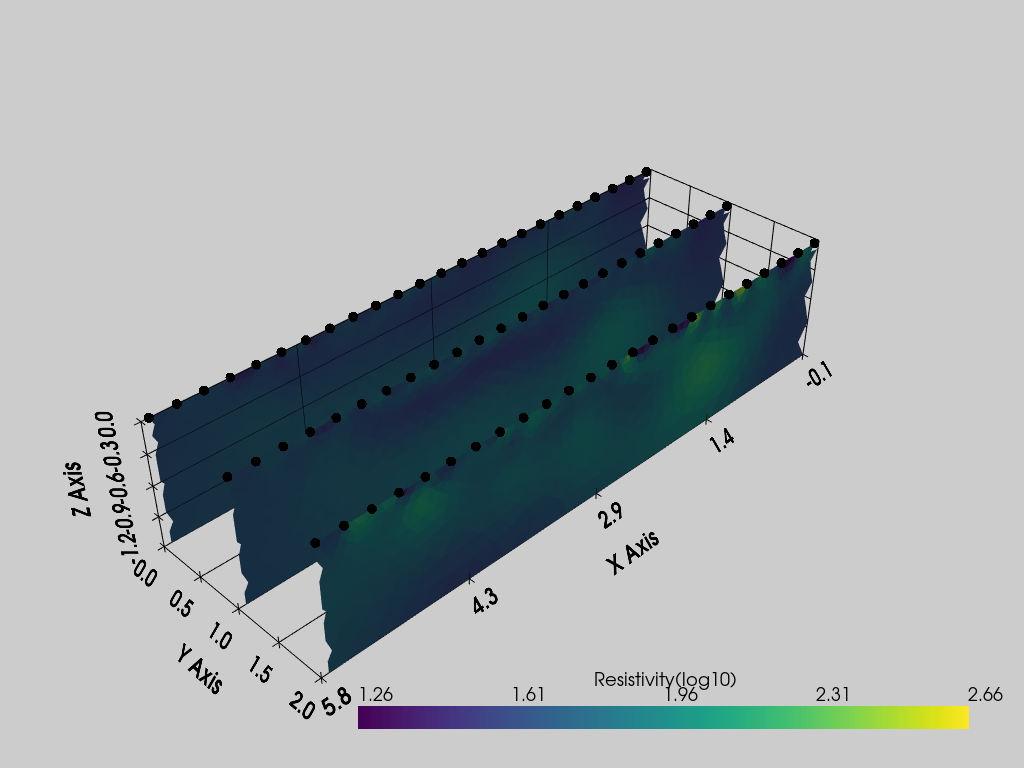

In [7]:
k.invertPseudo3D(runParallel=True)
k.showResults(index=-1, cropMesh=True) # only works with pyvista